# Handwritten Digits Recognition using Gaussian Naive Bayes Model (Scikit-Learn Dataset)

In [ ]:
# import theScikit-learn dataset
#1797 samples ans 8*8 grid of pixels 
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

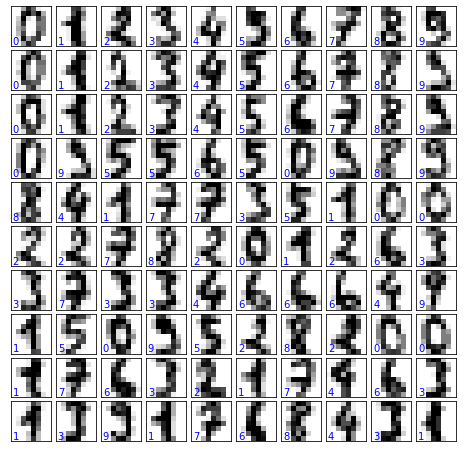

In [21]:
#Visualize the dataset
import matplotlib.pyplot as plt

fig,axes = plt.subplots(10,10, figsize=(8,8),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation = 'nearest'),
    ax.text(0.05,0.05,str(digits.target[i]),
           transform=ax.transAxes, color = 'blue')

In [22]:
#feature matrix, two dimentional [n_samples,n_features]
#1797 samples
#64 features
X = digits.data
X.shape

(1797, 64)

In [23]:
#lebel or target array, one dimentional
y=digits.target
y.shape

(1797,)

In [24]:
#Using Manifold learning algorithm or Isomap to reduce the dimention of fetures from 64 to 2
from sklearn.manifold import Isomap
iso = Isomap(n_components =2)
iso.fit(X)
data_projected = iso.transform(X)
data_projected.shape

(1797, 2)

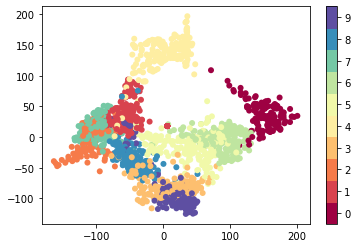

In [34]:
#now plot the data

plt.scatter(data_projected[:,0], data_projected[:,1], c = y,
           edgecolor='none',alpha=10,
           cmap = plt.cm.get_cmap('Spectral',10))
plt.colorbar(ticks = range(10))
plt.clim(-0.5,9.5)

In [37]:
#splitting train test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [39]:
#fit into Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
GNB= GaussianNB()
GNB.fit(X_train,y_train)
y_GNB = GNB.predict(X_test)

In [40]:
#test score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_GNB)

0.8333333333333334

Text(91.68, 0.5, 'True Value')

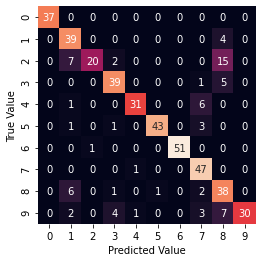

In [45]:
#making sklearn confusion matrix using seaborn heatmap
import seaborn as sns
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_GNB)
sns.heatmap(matrix, square = True, annot = True, cbar=False)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

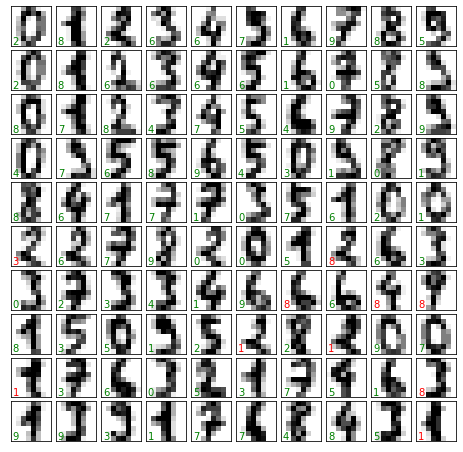

In [46]:
#visualize data with predicted label
#green for correct prediction
#red for incorrect prediction
fig,axes = plt.subplots(10,10, figsize=(8,8),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation = 'nearest'),
    ax.text(0.05,0.05,str(y_GNB[i]),
           transform=ax.transAxes, 
            color = 'green' if (y_test[i]==y_GNB[i]) 
                               else 'red')